In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
from scipy.optimize import minimize

In [2]:
#analytic profile of the core

def an_prof(r, rc, m22):
    rho = ((1.9*10**7) / (rc**4))/(m22**2)
    term = (1 + 0.091*(r/rc)**2)**-8
    return rho * term

In [3]:
# calculates the spherical shell mass at a given point
def enclosed_mass(r, dens):
    V = 4*np.pi*r**2
    return V*dens

In [4]:
r = np.linspace(0, 15, 1000000)
dr = 15 / 1000000
m22 = 1
dens = an_prof(r, 0.18, m22)
m = enclosed_mass(r,dens)
sum_up = 0
mencu = np.zeros(1000000)
for i in range(0, 1000000 - 1):
    menc[i] = sum_up
    sum_up = sum_up + m[i]*dr
sum_down = 0 
mencd = np.zeros(1000000)
for i in range(1, 1000000):
    sum_down = sum_down + m[i]*dr
    mencd[i] = sum_down
trap = (mencu + mencd) / 2
plt.plot(r, trap)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radial Distance (kpc)')
plt.ylabel('M(enclosed) (Msun)')
plt.title('Enclosed Mass vs. Distance, m22 = ' + str(m22))
plt.ylim(10**(5), 10**(10))
plt.xlim(10**(-3), 10**(1))


NameError: name 'menc' is not defined

-1223017682.0599692


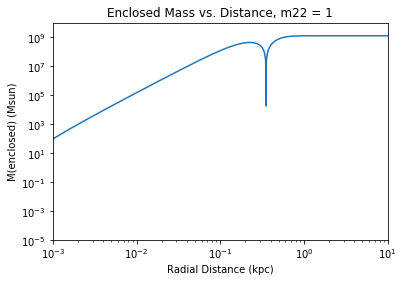

In [5]:
from scipy.integrate import trapz

r = np.linspace(0, 15, 100000)
m22 = 1
dens = an_prof(r, 0.18, m22)
m = dens*4*np.pi*(r**2)
#print(r)
#print(m)
m_enc = np.zeros(len(m))
print(trapz(r,m))
for i in range(0, len(m)):
    m_enc[i] = np.abs(trapz(r[0:i], m[0:i]))
plt.plot(r, m_enc)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radial Distance (kpc)')
plt.ylabel('M(enclosed) (Msun)')
plt.title('Enclosed Mass vs. Distance, m22 = ' + str(m22))
plt.ylim(10**(-5), 10**(10))
plt.xlim(10**(-3), 10**(1))
plt.show()
#print(m[:15])
#print(m_enc)

In [6]:
from scipy.integrate import quad

In [7]:
#analytic profile of the core

def an_prof2(r, rc, m22):
    rho = ((1.9*10**7) / (rc**4))/(m22**2)
    term = (1 + 0.091*(r/rc)**2)**-8
    return rho * term * 4*np.pi*(r**2)

/home/mnotis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/mnotis/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


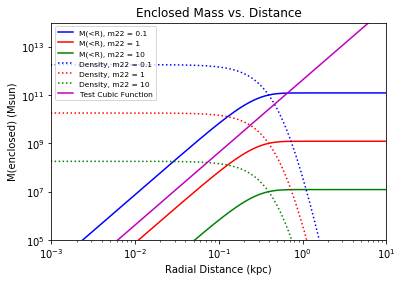

In [8]:
def plotter(upper_bound,rc,m22, c):
    r = np.linspace(0, upper_bound, 10000)
    m_enc = np.zeros(10000)
    for i in range(1, 10000):
        I = quad(an_prof2, 0, r[i], args=(rc,m22))
        m_enc[i] = I[0]
    plt.plot(r, m_enc, c)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Radial Distance (kpc)')
    plt.ylabel('M(enclosed) (Msun)')
    plt.title('Enclosed Mass vs. Distance')
    plt.ylim(10**(5), 10**(14))
    plt.xlim(10**(-3), 10**(1))

def an_plotter(upper_bound, rc, m22, c):
    r = np.linspace(0, upper_bound, 10000)
    plt.plot(r, an_prof(r, rc, m22), c)
    
#testing
plotter(15, 0.18, 0.1, 'b')
plotter(15, 0.18, 1, 'r')
plotter(15, 0.18, 10, 'g')

an_plotter(15, 0.18, 0.1, 'b:')
an_plotter(15, 0.18, 1, 'r:')
an_plotter(15, 0.18, 10, 'g:')

test_r = np.linspace(0, 1000, 1000000)
cubic =  10**(11)*(4/3)*np.pi*(test_r**3)
plt.plot(test_r,cubic, 'm')


plt.legend(['M(<R), m22 = 0.1','M(<R), m22 = 1', 'M(<R), m22 = 10', 'Density, m22 = 0.1', 'Density, m22 = 1', 'Density, m22 = 10', 'Test Cubic Function'],  prop={"size":7.5})

plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/enclosed_mass/r256/analytic_profiles.png')

In [8]:
def mass_profile_file(file_path):
    hf = h5py.File(file_path, 'r')
    dist = np.array(hf['distances'])
    dens = np.array(hf['densities'])
    dens_sphere = dens * 4*np.pi*(dist**2)
    m_enc = np.zeros(len(dens))
    sum = 0
    for i in range(0, len(m_enc) - 1):
        dr = dist[i + 1] - dist[i]
        upper_rect = dens_sphere[i] * dr
        lower_rect = dens_sphere[i + 1] *dr
        trap = (upper_rect + lower_rect) / 2
        sum = sum + trap 
        m_enc[i+ 1] = sum
    return dist, m_enc

[ 0.00000000e+00  0.00000000e+00  4.77796345e+07 ... -1.75973596e+09
 -1.77263152e+09 -2.00916099e+09]


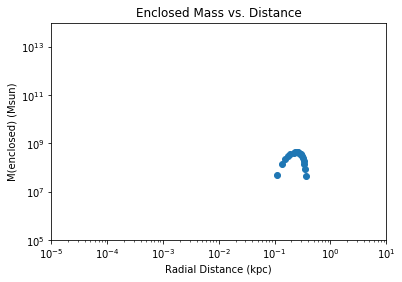

In [9]:
from scipy.integrate import trapz

def mass_profile_file_trap(file_path):
    hf = h5py.File(file_path, 'r')
    dist = np.array(hf['distances'])
    dens = np.array(hf['densities'])
    dens_sphere = dens * 4*np.pi*(dist**2)
    m_enc = np.zeros(len(dens))
    for i in range(0, len(m_enc)):
        m_enc[i] = trapz(dist[:i], dens_sphere[:i])
    return dist, m_enc

#testing
path = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/fInfL20T4n400r256/rad_filesradial0400.h5'
res = mass_profile_file_trap(path)
print(res[1])
plt.scatter(res[0], res[1])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radial Distance (kpc)')
plt.ylabel('M(enclosed) (Msun)')
plt.title('Enclosed Mass vs. Distance')
plt.ylim(10**(5), 10**(14))
plt.xlim(10**(-5), 10**(1))
plt.show()

In [10]:
def radial_plotter(file_path):
    test = mass_profile_file(file_path)
    plt.scatter(test[0], test[1])
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Radial Distance (kpc)')
    plt.ylabel('M(enclosed) (Msun)')
    plt.title('Enclosed Mass vs. Distance')
    plt.ylim(10**(5), 10**(14))
    plt.xlim(10**(-5), 10**(1))
    
    del_x = np.log10(test[0][6]) - np.log10(test[0][1])
    del_y = np.log10(test[1][6]) - np.log10(test[1][1])
    slope = del_y/del_x
    plt.legend(['Core Slope = ' + str(slope)])

In [11]:
def radial_plotter_file_cubic(file_path, r ,f_val, slope_points):
    data = mass_profile_file(file_path)
    plt.scatter(data[0], data[1])
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Radial Distance (kpc)')
    plt.ylabel('M(enclosed) (Msun)')
    plt.title('Enclosed Mass vs. Distance: f = ' + str(f_val) + ', r = '+ str(r))
    plt.ylim(10**(5), 10**(14))
    plt.xlim(10**(-3), 10**(2))
    
    del_x = np.log10(data[0][slope_points]) - np.log10(data[0][1])
    del_y = np.log10(data[1][slope_points]) - np.log10(data[1][1])
    slope = del_y/del_x
    print(data[1][slope_points])
    test_r = np.linspace(0, 1000, 1000000)
    cubic =  10**(11)*(4/3)*np.pi*(test_r**3)
    plt.plot(test_r,cubic, 'g')
    plt.legend(['Core Slope = ' + str(slope), 'Test Slope = 3.0'])
    plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/enclosed_mass/r'+ str(r)+ '/f' + str(f_val) + '.png')

/home/mnotis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  app.launch_new_instance()
/home/mnotis/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


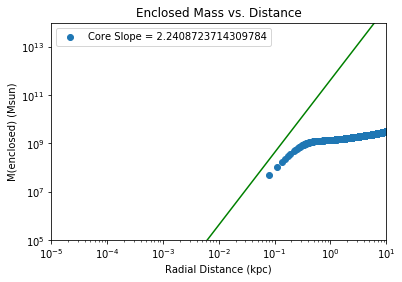

In [12]:
#testing
pathInf = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/fInfL20T4n400r256/rad_filesradial0400.h5'
radial_plotter(pathInf)
test_r = np.linspace(0, 1000, 1000000)
cubic =  10**(11)*(4/3)*np.pi*(test_r**3)
plt.plot(test_r,cubic, 'g')
del_x = np.log10(test_r[800000]) - np.log10(test_r[200000])
del_y = np.log10(cubic[800000])- np.log10(cubic[200000])
slope = del_y/del_x
#radial_plotter(path4, 'g--')
#radial_plotter(path1, 'b--')

test_r = np.linspace(0, 15, 10000)
cubic = (4/3)*np.pi*(test_r**3)
plt.plot(test_r,cubic, 'g')
plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/enclosed_mass/r256/fInf.png')
plt.show()




In [ ]:
#testing
pathInf = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1L20T4n400r256/radial0400.h5'
radial_plotter(pathInf)
test_r = np.linspace(0, 1000, 1000000)
cubic =  10**(11)*(4/3)*np.pi*(test_r**3)
plt.plot(test_r,cubic, 'g')
del_x = np.log10(test_r[800000]) - np.log10(test_r[200000])
del_y = np.log10(cubic[800000])- np.log10(cubic[200000])
slope = del_y/del_x
#radial_plotter(path4, 'g--')
#radial_plotter(path1, 'b--')

test_r = np.linspace(0, 15, 10000)
cubic = (4/3)*np.pi*(test_r**3)
plt.plot(test_r,cubic, 'g')
plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/enclosed_mass/r256/f1.png')
plt.show()

In [ ]:
#testing
pathInf = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f4L20T4n400r256/radial0400.h5'
radial_plotter(pathInf)
test_r = np.linspace(0, 1000, 1000000)
cubic =  10**(11)*(4/3)*np.pi*(test_r**3)
plt.plot(test_r,cubic, 'g')
del_x = np.log10(test_r[800000]) - np.log10(test_r[200000])
del_y = np.log10(cubic[800000])- np.log10(cubic[200000])
slope = del_y/del_x
#radial_plotter(path4, 'g--')
#radial_plotter(path1, 'b--')

test_r = np.linspace(0, 15, 10000)
cubic = (4/3)*np.pi*(test_r**3)
plt.plot(test_r,cubic, 'g')
plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/enclosed_mass/r256/f4.png')
plt.show()

In [ ]:
#testing
pathInf = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.5L20T4n400r256/radial0170.h5'
radial_plotter(pathInf)
test_r = np.linspace(0, 1000, 1000000)
cubic =  10**(11)*(4/3)*np.pi*(test_r**3)
plt.plot(test_r,cubic, 'g')
del_x = np.log10(test_r[800000]) - np.log10(test_r[200000])
del_y = np.log10(cubic[800000])- np.log10(cubic[200000])
slope = del_y/del_x
#radial_plotter(path4, 'g--')
#radial_plotter(path1, 'b--')

test_r = np.linspace(0, 15, 10000)
cubic = (4/3)*np.pi*(test_r**3)
plt.plot(test_r,cubic, 'g')
plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/enclosed_mass/r256/f1.5.png')
plt.show()

In [ ]:
test_r = np.linspace(0, 1000, 1000000)
cubic =  10**(11)*(4/3)*np.pi*(test_r**3)
plt.plot(test_r,cubic, 'g')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radial Distance (kpc)')
plt.ylabel('M(enclosed) (Msun)')
plt.title('Enclosed Mass vs. Distance')
plt.ylim(10**(5), 10**(14))
plt.xlim(10**(-5), 10**(4))
del_x = np.log10(test_r[800000]) - np.log10(test_r[200000])
del_y = np.log10(cubic[800000])- np.log10(cubic[200000])
slope = del_y/del_x
plt.legend(['Core Slope = ' + str(slope)])

plt.show()



757622428.3204108


/home/mnotis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/mnotis/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


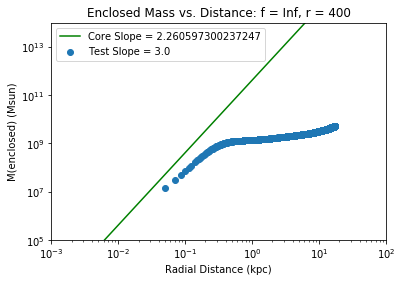

In [10]:
pathInf = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/fInfL20T4n400r400/radial0400.h5'
radial_plotter_file_cubic(pathInf, 400, 'Inf', 30)

759686796.5715729


/home/mnotis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/mnotis/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


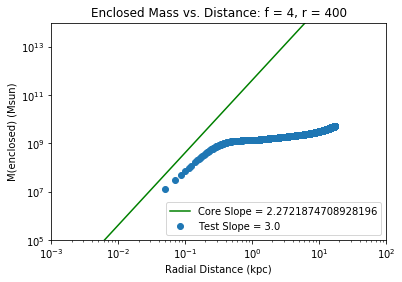

In [11]:
path4 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f4L20T4n400r400/radial0400.h5'
radial_plotter_file_cubic(path4, 400, 4, 30)

258591541.56905589


/home/mnotis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/mnotis/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


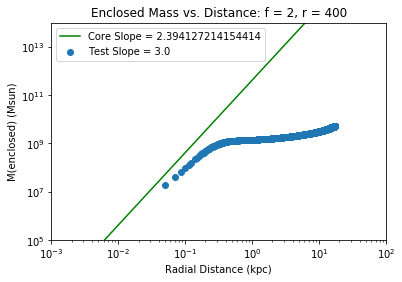

In [12]:
path2 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f2L20T4n400r400/radial0400.h5'
radial_plotter_file_cubic(path2, 400, 2, 8)

198893569.98059484


/home/mnotis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/mnotis/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


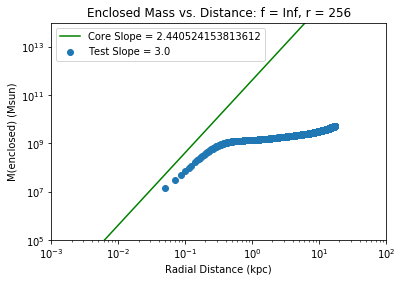

In [29]:
pathInf2 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/fInfL20T4n400r256/radial0400.h5'
radial_plotter_file_cubic(pathInf, 256, 'Inf', 8)

198893569.98059484


/home/mnotis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/mnotis/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


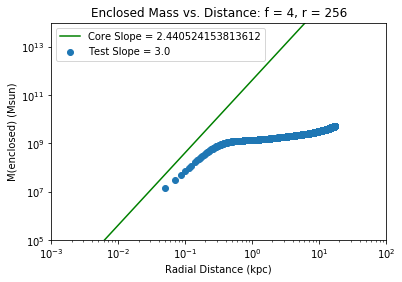

In [30]:
pathInf2 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f4L20T4n400r256/radial0400.h5'
radial_plotter_file_cubic(pathInf, 256, 4, 8)